## 非線形回帰
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  noiseの値を変更しよう
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 100. 誤差 = 20.374762
Generation: 200. 誤差 = 17.071342
Generation: 300. 誤差 = 14.211705
Generation: 400. 誤差 = 11.754544
Generation: 500. 誤差 = 9.660111
Generation: 600. 誤差 = 7.8902617
Generation: 700. 誤差 = 6.40853
Generation: 800. 誤差 = 5.18026
Generation: 900. 誤差 = 4.1727467
Generation: 1000. 誤差 = 3.3554044
Generation: 1100. 誤差 = 2.699934
Generation: 1200. 誤差 = 2.180472
Generation: 1300. 誤差 = 1.7737045
Generation: 1400. 誤差 = 1.4589418
Generation: 1500. 誤差 = 1.2181194
Generation: 1600. 誤差 = 1.0357409
Generation: 1700. 誤差 = 0.89875215
Generation: 1800. 誤差 = 0.7963601
Generation: 1900. 誤差 = 0.7198185
Generation: 2000. 誤差 = 0.66218084
Generation: 2100. 誤差 = 0.61804765
Generation: 2200. 誤差 = 0.5833159
Generation: 2300. 誤差 = 0.55494416
Generation: 2400. 誤差 = 0.53073865
Generation: 2500. 誤差 = 0.5091638
Generation: 2600. 誤差 = 0.48917997
Generation: 2700. 誤差 = 0.47011116
Generation: 2800. 誤差 = 0.45153916
Generation: 2900. 誤差 = 0.43322128
Generation: 3000. 誤差 = 0.41502994
Generation: 3100

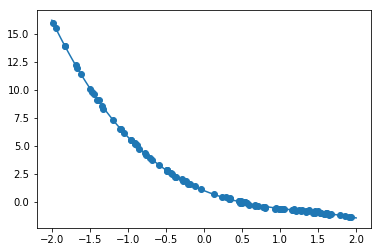

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  次の式をモデルとして回帰を行おう
$$ y=30x^{2} +0.5x+0.2 $$<br>
-  誤差が収束するようiters_numやlearning_rateを調整しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------